###### Importation

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [68]:
data = pd.read_csv('all_data.csv')

In [69]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,1,11,14,3,4,7,8,9,a,b
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,0.0,0.0,0.0,777.0,0.0,331.0,339.0,402.0,95.0,0.0


###### Missing data

In [70]:
for col in data.columns:
    print("missing data in {} : {} i.e. {}%".format(col,len(data[data[col].isnull()]),
                                                       len(data[data[col].isnull()])/float(len(data))*100))

missing data in co2 : 9585 i.e. 9.11841091355%
missing data in humi : 4409 i.e. 4.19437388814%
missing data in no : 20924 i.e. 19.9054387016%
missing data in no2 : 12155 i.e. 11.5633056499%
missing data in pm10 : 7853 i.e. 7.47072309902%
missing data in pm2.5 : 73562 i.e. 69.9810687139%
missing data in station : 0 i.e. 0.0%
missing data in temp : 4424 i.e. 4.20864370178%
missing data in date : 0 i.e. 0.0%
missing data in time : 0 i.e. 0.0%
missing data in precipitation : 144 i.e. 0.136990210908%
missing data in temp_min : 144 i.e. 0.136990210908%
missing data in temp_max : 144 i.e. 0.136990210908%
missing data in holiday : 0 i.e. 0.0%
missing data in celebration : 0 i.e. 0.0%
missing data in 1 : 0 i.e. 0.0%
missing data in 11 : 0 i.e. 0.0%
missing data in 14 : 0 i.e. 0.0%
missing data in 3 : 0 i.e. 0.0%
missing data in 4 : 0 i.e. 0.0%
missing data in 7 : 0 i.e. 0.0%
missing data in 8 : 0 i.e. 0.0%
missing data in 9 : 0 i.e. 0.0%
missing data in a : 0 i.e. 0.0%
missing data in b : 0 i.e

Top three missing data columns :  
-no  
-pm10  
-pm2.5  
-co2  

WARNING no missing data in timetable, stations ect... because I(romain) generated the data

There are a couple of missing days in the meteo columns, I propose to take the mean of the previous and past days.

#### Date & Time processing

In [71]:
data['datetime'] = data['date'].str.cat(data['time'].astype(str), sep = ' ')

In [72]:
data['datetime'] = pd.to_datetime(data['datetime'], format = '%Y-%m-%d %H:%M:%S')

In [73]:
data['year'],data['month'],data['day'] = data["date"].str.split("-").str
data['year'] = data['year'].astype(int)
data['month'] = data['month'].astype(int)
data['day'] = data['day'].astype(int)

In [74]:
data['hour'],data['minute'],data['second'] = data["time"].str.split(":").str
data['hour'] = data['hour'].astype(int)
data['minute'] = data['minute'].astype(int)
data['second'] = data['second'].astype(int)

In [75]:
data = data.drop(labels = ['minute','second'], axis = 1)

In [76]:
data['date'] = pd.to_datetime(data['date'], format = "%Y-%m-%d")

In [77]:
data['week'] = data['date'].dt.week

In [78]:
data['weekday'] = data['date'].dt.dayofweek

In [79]:
data['time'] = pd.to_datetime(data['time'], format = "%H:%M:%S")

In [80]:
data['time'] = data["time"].dt.time

###### Missing data in meteo

In [81]:
data[data['precipitation'].isnull()]

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,datetime,year,month,day,hour,week,weekday
1260,446.0,43.2,34.0,73.0,32.0,14.0,auber,17.3,2016-04-30,10:00:00,...,402.0,95.0,0.0,2016-04-30 10:00:00,2016,4,30,10,17,5
1413,609.0,41.8,162.0,88.0,143.0,50.0,auber,25.6,2016-08-31,10:00:00,...,402.0,95.0,0.0,2016-08-31 10:00:00,2016,8,31,10,35,2
2777,477.0,41.6,33.0,67.0,35.0,16.0,auber,17.7,2016-04-30,13:00:00,...,390.0,94.0,0.0,2016-04-30 13:00:00,2016,4,30,13,17,5
2871,486.0,37.2,33.0,92.0,74.0,24.0,auber,25.8,2016-08-31,13:00:00,...,390.0,94.0,0.0,2016-08-31 13:00:00,2016,8,31,13,35,2
4138,526.0,34.3,23.0,102.0,85.0,28.0,auber,26.5,2016-08-31,17:00:00,...,630.0,135.0,0.0,2016-08-31 17:00:00,2016,8,31,17,35,2
4283,530.0,39.4,45.0,81.0,34.0,17.0,auber,17.9,2016-04-30,17:00:00,...,630.0,135.0,0.0,2016-04-30 17:00:00,2016,4,30,17,17,5
5486,507.0,35.0,25.0,106.0,76.0,26.0,auber,26.2,2016-08-31,16:00:00,...,545.0,103.0,0.0,2016-08-31 16:00:00,2016,8,31,16,35,2
5709,506.0,41.5,41.0,78.0,47.0,23.0,auber,17.8,2016-04-30,16:00:00,...,545.0,103.0,0.0,2016-04-30 16:00:00,2016,4,30,16,17,5
7208,404.0,45.3,16.0,59.0,14.0,7.0,auber,17.6,2016-04-30,03:00:00,...,19.0,0.0,0.0,2016-04-30 03:00:00,2016,4,30,3,17,5
7242,409.0,40.2,58.0,84.0,121.0,38.0,auber,25.7,2016-08-31,03:00:00,...,19.0,0.0,0.0,2016-08-31 03:00:00,2016,8,31,3,35,2


In [82]:
for idx in data[data['temp_min'].isnull()].index:
    data.loc[idx,'temp_min'] = (data.loc[idx-1,'temp_min'] + data.loc[idx+1,'temp_min'])/2
for idx in data[data['temp_max'].isnull()].index:
    data.loc[idx,'temp_max'] = (data.loc[idx-1,'temp_max'] + data.loc[idx+1,'temp_max'])/2
for idx in data[data['precipitation'].isnull()].index:
    data.loc[idx,'precipitation'] = (data.loc[idx-1,'precipitation'] + data.loc[idx+1,'precipitation'])/2
for idx in data[data['precipitation'].isnull()].index:
    data.loc[idx,'precipitation'] = (data.loc[idx-1,'precipitation'] + data.loc[idx+1,'precipitation'])/2

###### Missing data in CO2

In [83]:
mask = (data['date'] >= pd.datetime(2015,5,6)) & (data['date'] < pd.datetime(2015,5,21))

In [85]:
data = data.drop(labels = data.loc[mask].index, axis = 0)

In [86]:
data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,9,a,b,datetime,year,month,day,hour,week,weekday
0,403.0,51.2,NaN,NaN,295.0,118.0,auber,20.4,2013-01-01,10:00:00,...,402.0,95.0,0.0,2013-01-01 10:00:00,2013,1,1,10,1,1
1,767.0,46.4,99.0,54.0,362.0,110.0,auber,18.3,2013-01-15,10:00:00,...,402.0,95.0,0.0,2013-01-15 10:00:00,2013,1,15,10,3,1
2,495.0,45.0,68.0,45.0,117.0,36.0,auber,18.7,2013-01-12,10:00:00,...,402.0,95.0,0.0,2013-01-12 10:00:00,2013,1,12,10,2,5
3,708.0,45.3,90.0,40.0,234.0,73.0,auber,19.5,2013-01-09,10:00:00,...,402.0,95.0,0.0,2013-01-09 10:00:00,2013,1,9,10,2,2
4,749.0,41.8,213.0,62.0,314.0,112.0,auber,17.5,2013-01-16,10:00:00,...,402.0,95.0,0.0,2013-01-16 10:00:00,2013,1,16,10,3,2


In [87]:
mask = (data['date'] >= pd.datetime(2016,7,23)) & (data['date'] < pd.datetime(2016,8,23))

In [88]:
data = data.drop(data.loc[mask].index)

In [34]:
for idx in data[data['co2'].isnull()].index:
    index = (data['month'] == data.loc[idx,'month']) & (data['day'] == data.loc[idx,'day']) & (data['station'] == data.loc[idx,'station'])
    data.loc[idx,'co2'] = data.loc[index,'co2'].mean()

In [35]:
data['missing_co2'] = 0
data['missing_co2'][data['co2'].isnull()] = 1

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


For 15860 raws, data is missing for almost all sensors (except rain) -> remove all these rows

In [36]:
missing_data = data[data["co2"].isnull() | 
                        data["humi"].isnull() |
                        data["no"].isnull() | 
                        data["no2"].isnull() |
                        data["pm10"].isnull() | 
                        data["pm2.5"].isnull() | 
                        data["no2"].isnull() |
                       data["temp"].isnull()]

In [37]:
missing_data.head()

,co2,humi,no,no2,pm10,pm2.5,station,temp,date,time,...,a,b,datetime,year,month,day,hour,week,weekday,missing_co2


/home/romain/.local/lib/python2.7/site-packages/seaborn/distributions.py:195: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/romain/.local/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/romain/.virtualenvs/python2.7/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


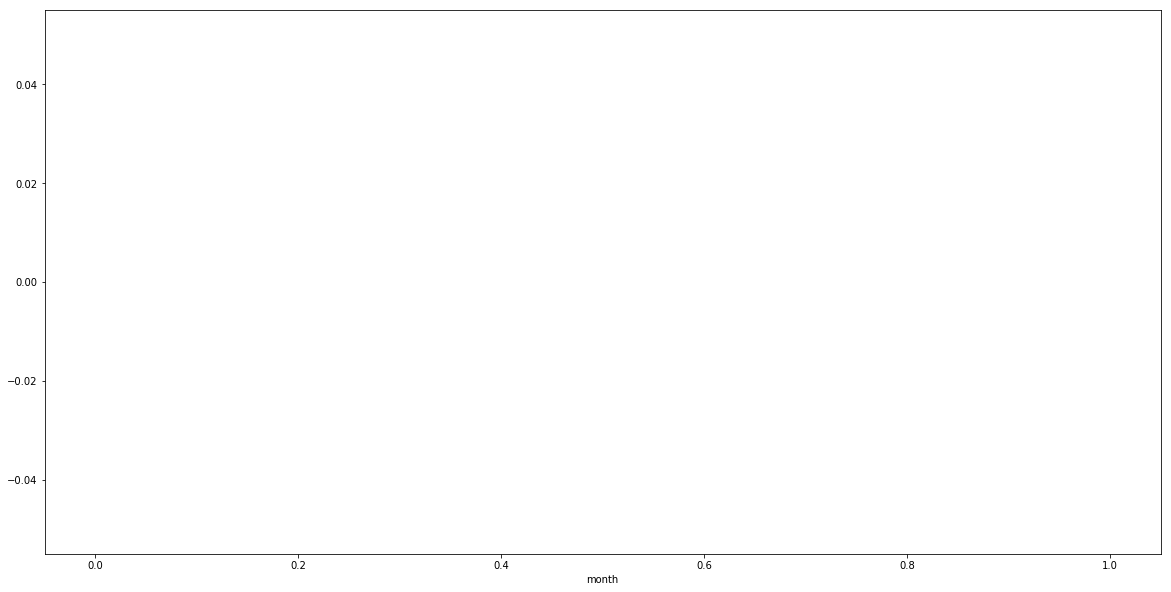

In [38]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(missing_data[missing_data['station'] == 'auber']['month'], ax = ax, kde = False)

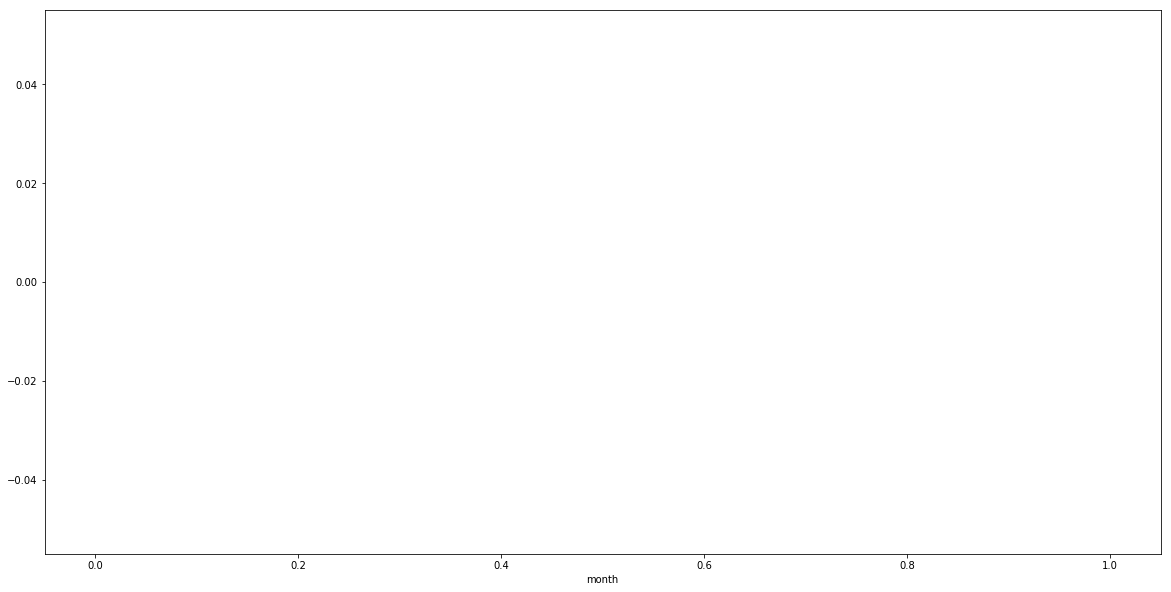

In [39]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(missing_data[missing_data['station'] == 'chatelet']['month'], ax = ax, kde = False)

/home/romain/.local/lib/python2.7/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


TypeError: Empty 'DataFrame': no numeric data to plot

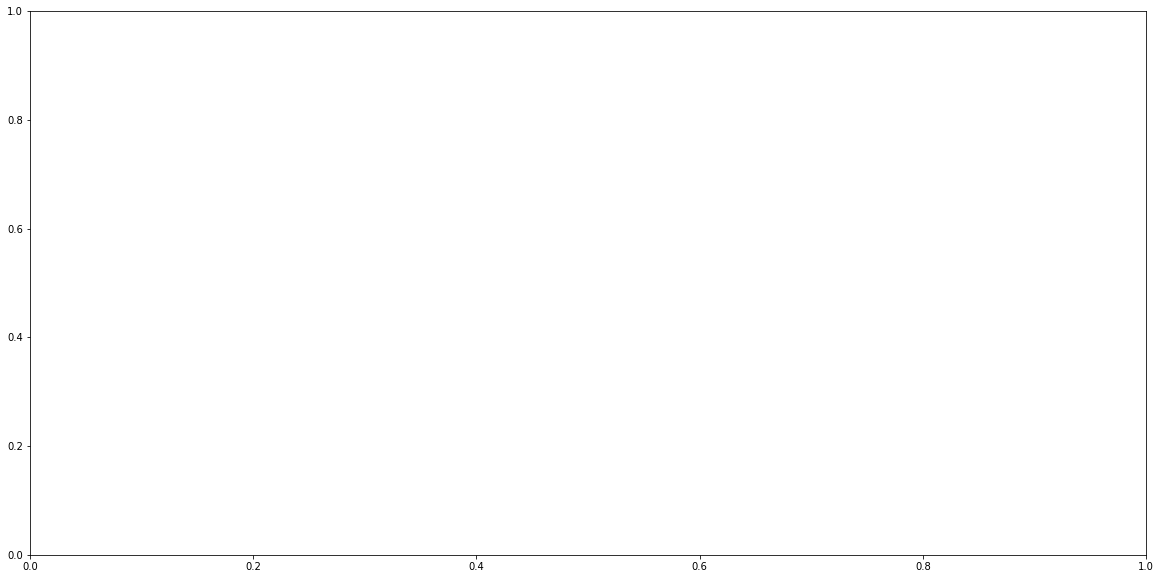

In [40]:
fig, ax = plt.subplots(figsize=(20,10))
missing_data.plot(x = 'date', y = ['co2','no','no2','humi','pm10','pm2.5','temp'], ax = ax)
plt.show()

A chatelet il semble que le mois d'aout contiennent le plus de valeurs manquantes (# vacances), les autres contiennent une quantité constante de données manquantes.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(ax=ax,data = missing_data,x="station")

Let's choose auber because, it is the station with the least missing data


In [41]:
data = data.drop(labels=['no','no2','pm10','pm2.5'], axis = 1)

In [42]:
data = data.dropna()

In [43]:
data = data[data['station'] == 'auber']

###### Frequentation
Frequentation is the sum of the trains per hour over all lines

In [44]:
data['frequentation'] = data['a']+data['b']+data['1']+data['11']+data['14']+data['3']+data['4']+data['7']+data['9']

,co2,humi,station,temp,date,time,precipitation,temp_min,temp_max,holiday,...,b,datetime,year,month,day,hour,week,weekday,missing_co2,frequentation


ValueError: min() arg is an empty sequence

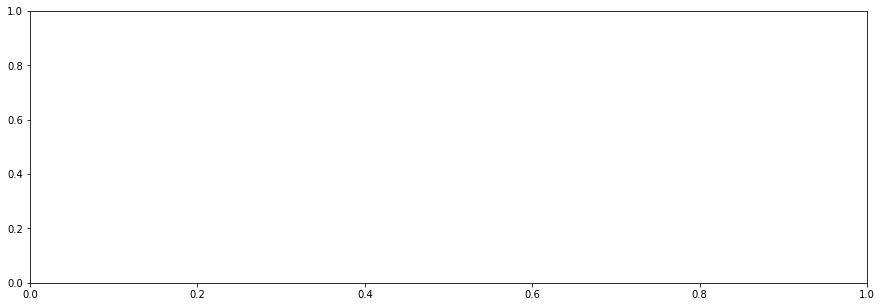

In [45]:
fig, ax = plt.subplots(figsize=(15,5))
sns.factorplot(x="month", y="frequentation", hue = "year", data=data, kind = "box", ax = ax)

###### Celebration & holidays impact

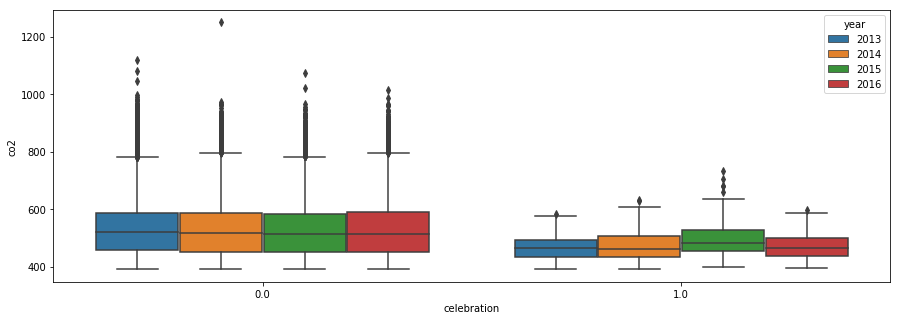

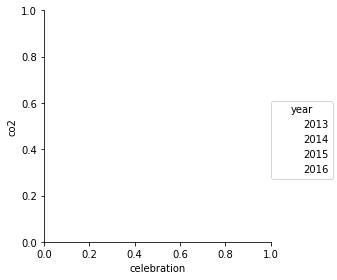

In [98]:
fig, ax = plt.subplots(figsize=(15,5))
sns.factorplot(x="celebration", y="co2", hue = "year", data=data, kind = "box", ax = ax)

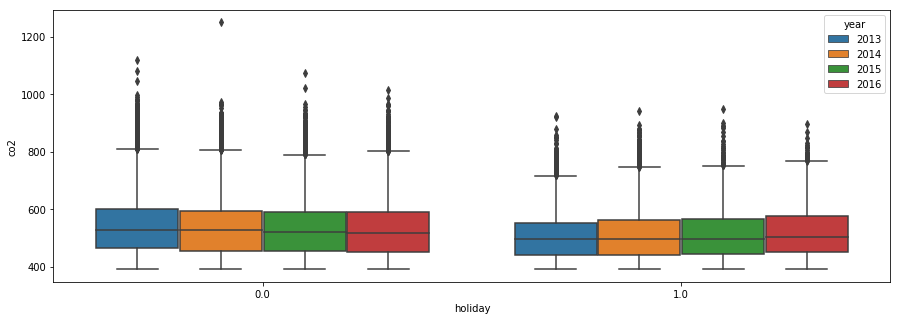

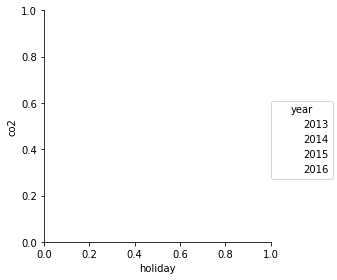

In [99]:
fig, ax = plt.subplots(figsize=(15,5))
sns.factorplot(x="holiday", y="co2", hue = "year", data=data, kind = "box", ax = ax)

###### Daily visualization

In [100]:
mask = (data['date'] > pd.datetime(2016,1,1)) & (data['date'] <= pd.datetime(2016,1,2))

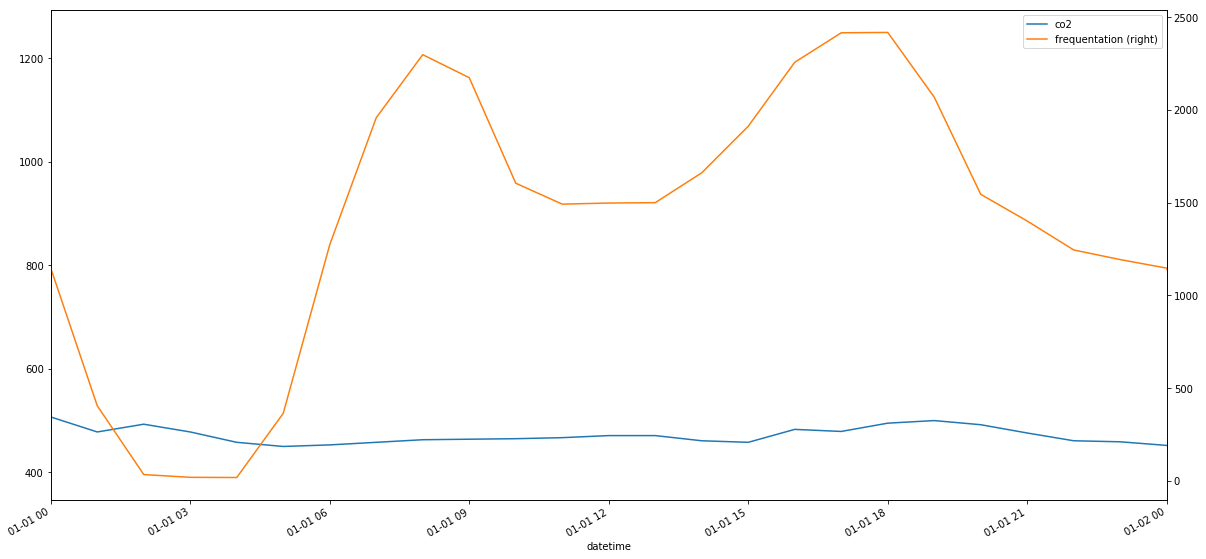

In [101]:
fig, ax = plt.subplots(figsize=(20,10))
ax.set_xlim([pd.datetime(2016,1,1,0),pd.datetime(2016,1,2,0)])
data.plot(x = ['datetime'],y = ['co2'], ax = ax)
data.plot(x = ['datetime'],y = ['frequentation'], ax = ax, secondary_y = True)


###### Time delay
Adding a time to take in account the forecasting aspect

In [102]:
delay = 24
data['co2_delay'] = data['co2']
data['co2_delay'] = data['co2_delay'].shift(delay)

In [103]:
data_2013 = data[(data['year'] == 2013) & (data['month'] == 1)]

###### Delayed rolling mean

In [104]:
data_2013['co2_d'] = pd.rolling_mean(data_2013['co2'], window = 24, min_periods=1)
data_2013['co2_w'] = pd.rolling_mean(data_2013['co2'], window = 24*7, min_periods=1)

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=24,center=False).mean()
  """Entry point for launching an IPython kernel.
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=168,center=False).mean()
  
/home/romain/.

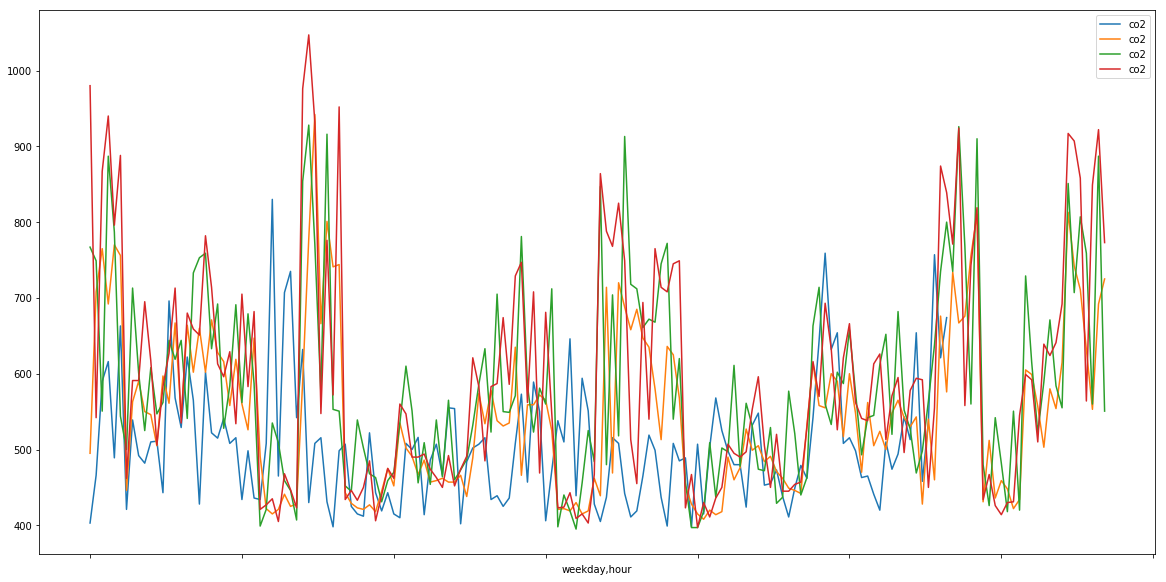

In [105]:
fig, ax = plt.subplots(figsize=(20,10))
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = 'co2', ax = ax)
data_2013[data_2013["week"] == 2].plot(x = ['weekday','hour'],y = 'co2', ax = ax)
data_2013[data_2013["week"] == 3].plot(x = ['weekday','hour'],y = 'co2', ax = ax)
data_2013[data_2013["week"] == 4].plot(x = ['weekday','hour'],y = 'co2', ax = ax)

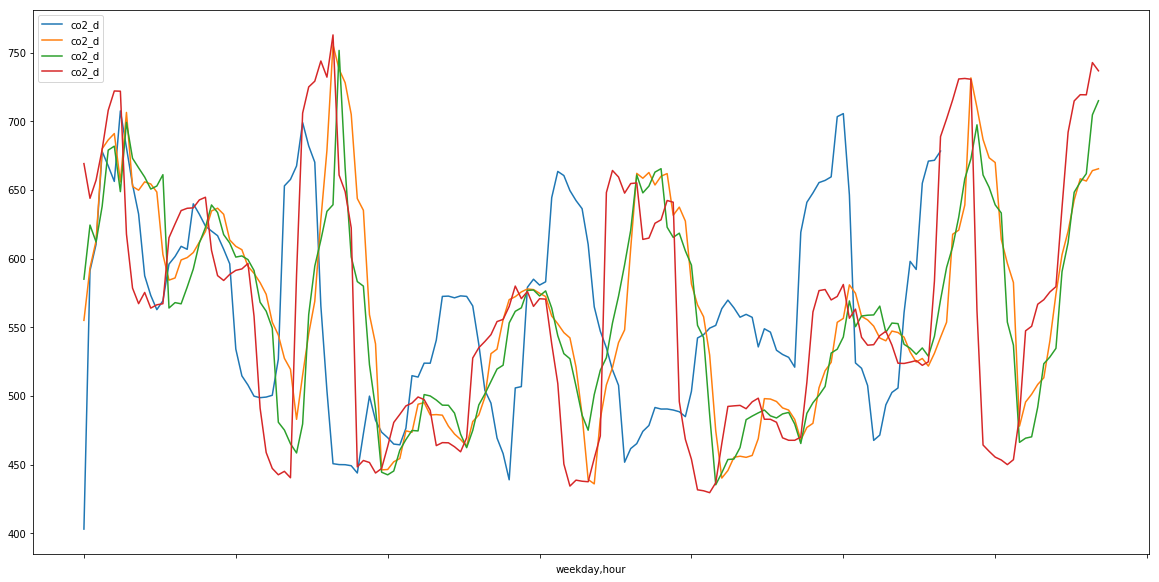

In [106]:
fig, ax = plt.subplots(figsize=(20,10))
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = 'co2_d', ax = ax)
data_2013[data_2013["week"] == 2].plot(x = ['weekday','hour'],y = 'co2_d', ax = ax)
data_2013[data_2013["week"] == 3].plot(x = ['weekday','hour'],y = 'co2_d', ax = ax)
data_2013[data_2013["week"] == 4].plot(x = ['weekday','hour'],y = 'co2_d', ax = ax)

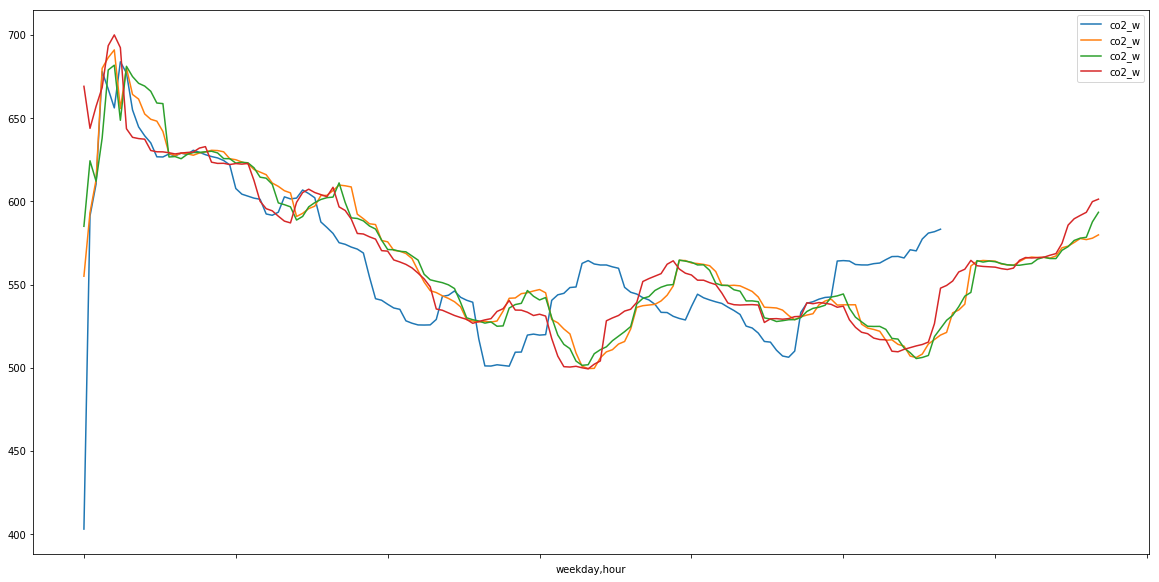

In [107]:
fig, ax = plt.subplots(figsize=(20,10))
data_2013[data_2013["week"] == 1].plot(x = ['weekday','hour'],y = 'co2_w', ax = ax)
data_2013[data_2013["week"] == 2].plot(x = ['weekday','hour'],y = 'co2_w', ax = ax)
data_2013[data_2013["week"] == 3].plot(x = ['weekday','hour'],y = 'co2_w', ax = ax)
data_2013[data_2013["week"] == 4].plot(x = ['weekday','hour'],y = 'co2_w', ax = ax)

In [108]:
data['co2_3h'] = pd.rolling_mean(data['co2_delay'], window = 3, min_periods=1)
data['co2_d'] = pd.rolling_mean(data['co2_delay'], window = 24, min_periods=1)
data['co2_w'] = pd.rolling_mean(data['co2_delay'], window = 24*7, min_periods=1)

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=3,center=False).mean()
  """Entry point for launching an IPython kernel.
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=24,center=False).mean()
  
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(min_periods=1,window=168,center=False).mean()
  This is separate from the ipykernel package so we can avoid doing imports until


###### Building sliding window

In [109]:
delay = 24
window = 24
source = 'co2'
lag =  1
for idx in range(lag,window):
    data[source + '_'  + str(idx)] = data[source]
    data[source + '_' + str(idx)] = data[source + '_' + str(idx)].shift(idx)
    
# removing the nans at the start
data = data.iloc[window:,:]

###### Pairplot

In [42]:
data_corr = data[['frequentation','year','month','day','hour','weekday','week','precipitation','temp_min','temp_max','co2','co2_3h','co2_d','co2_w','celebration','holiday']]

In [43]:
data_corr.columns

Index([u'frequentation', u'year', u'month', u'day', u'hour', u'weekday',
       u'week', u'precipitation', u'temp_min', u'temp_max', u'co2', u'co2_3h',
       u'co2_d', u'co2_w', u'celebration', u'holiday'],
      dtype='object')

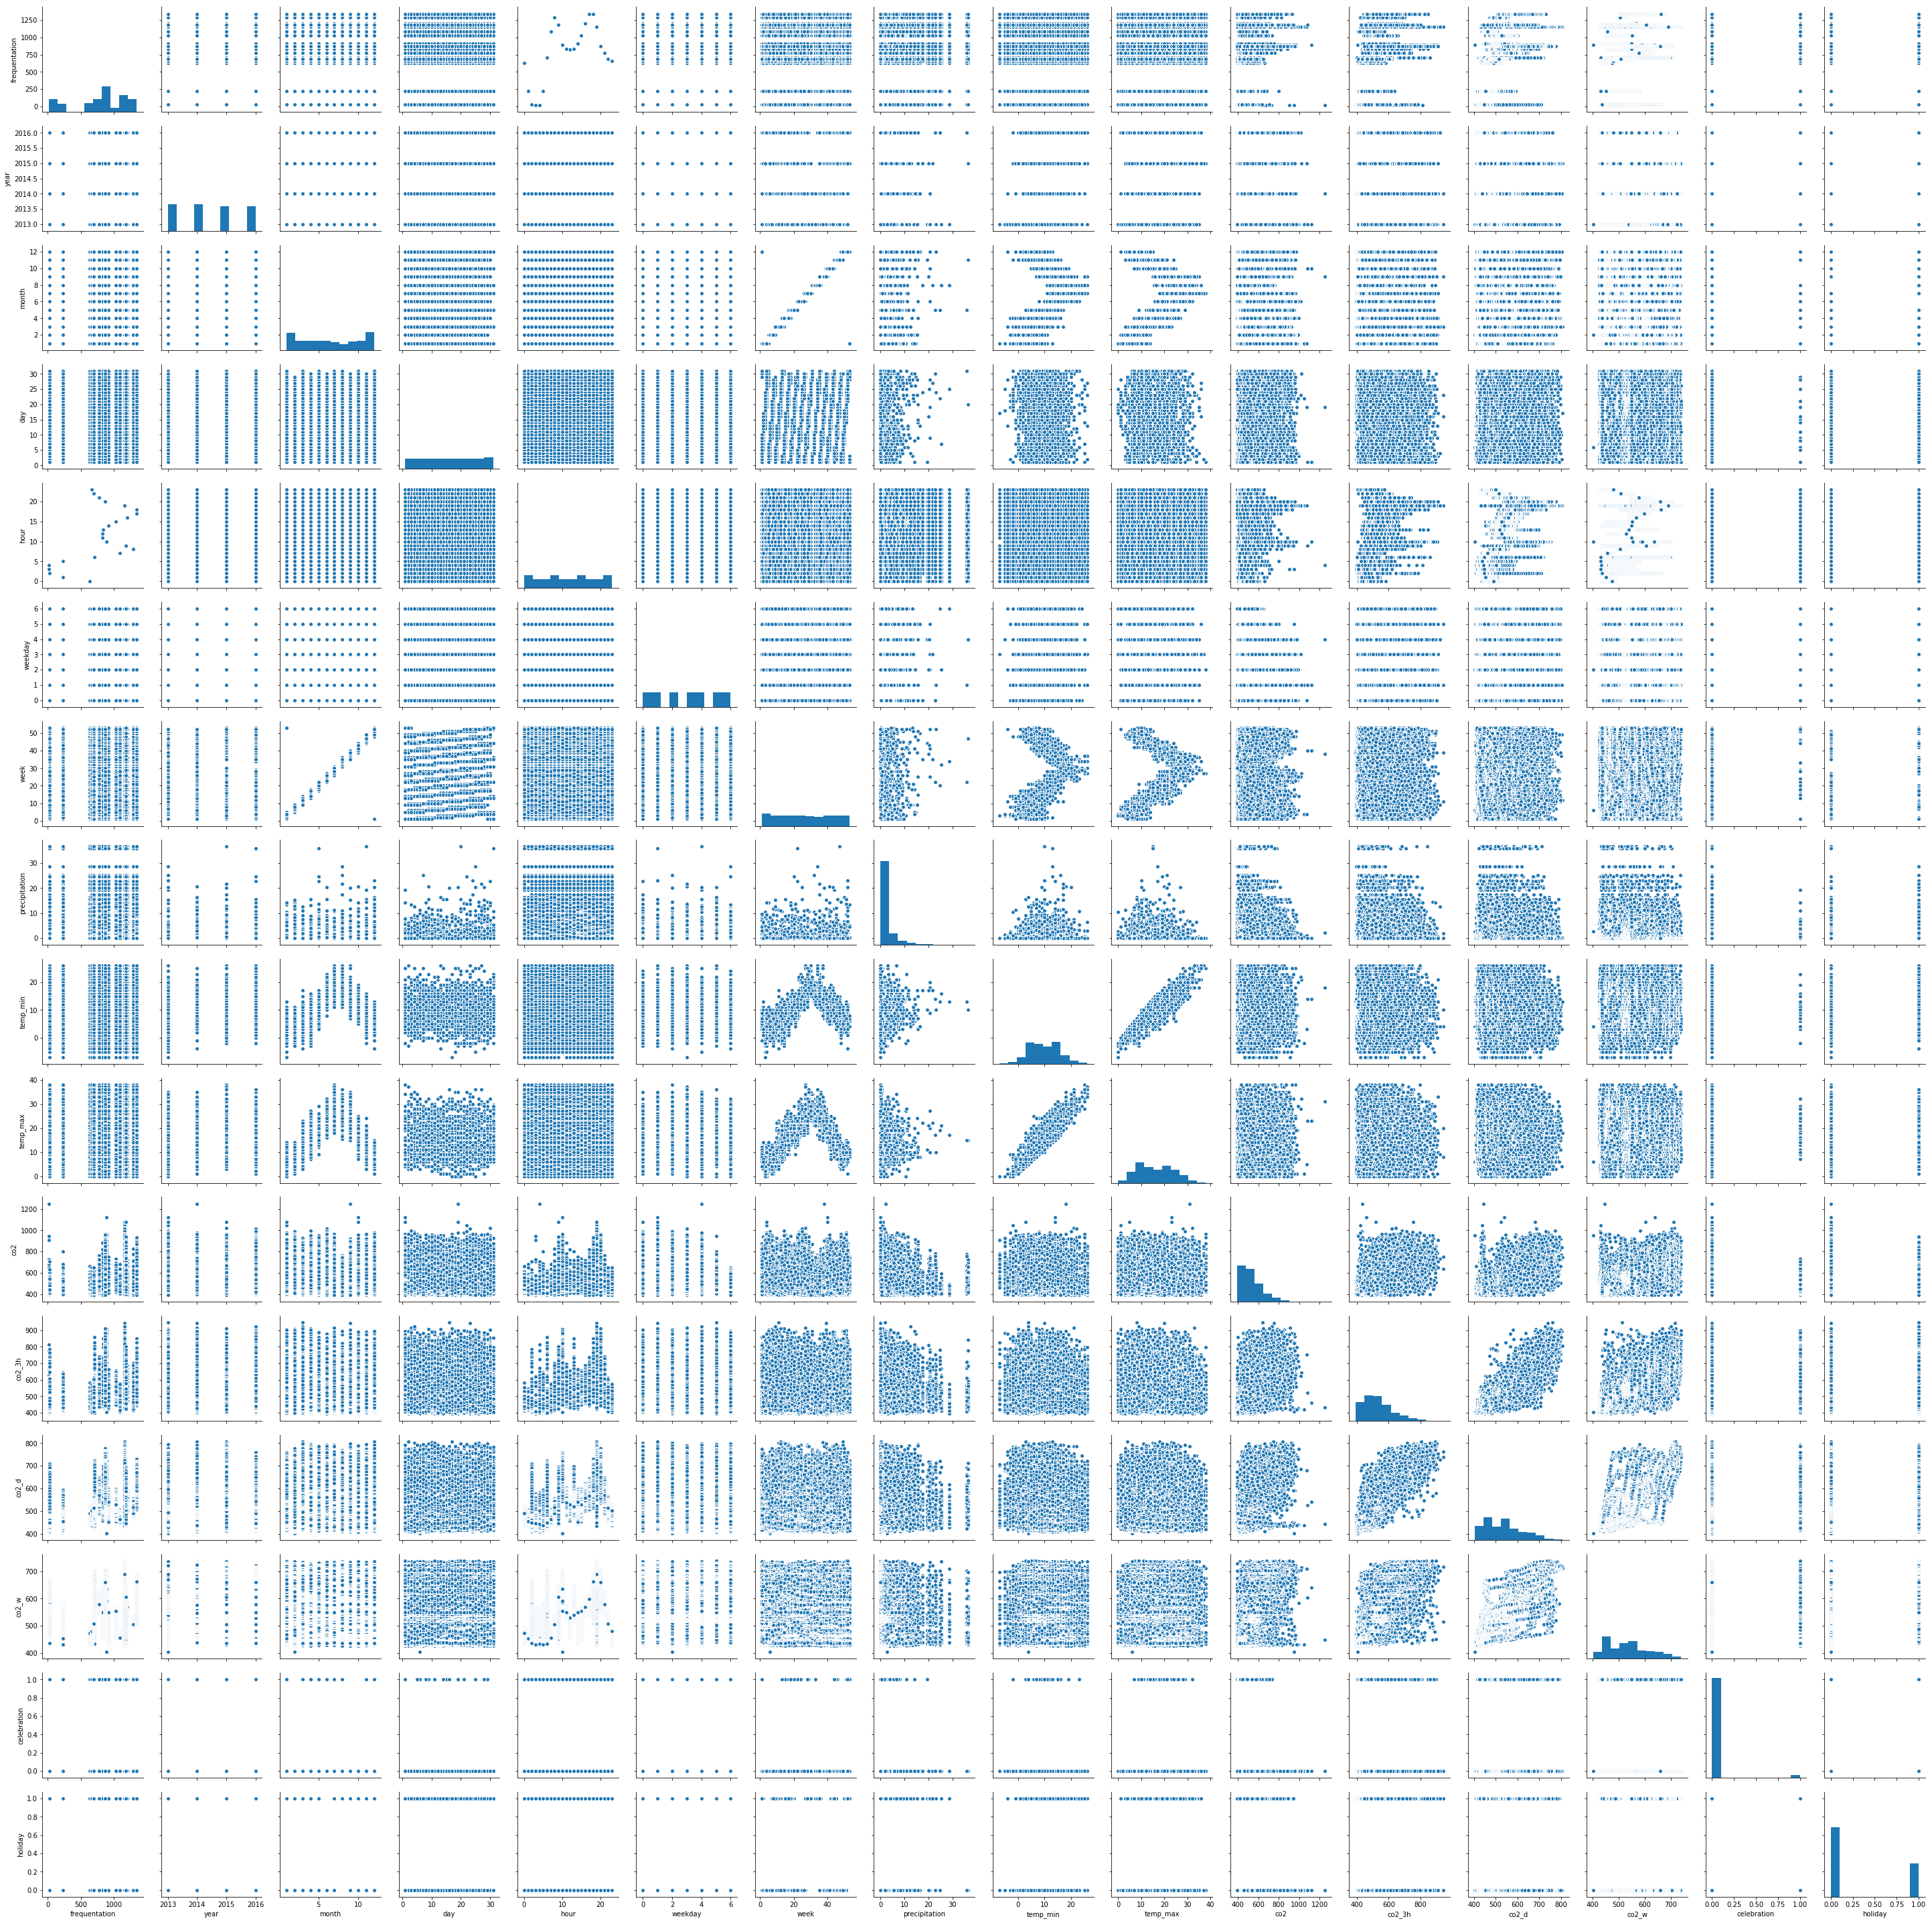

In [44]:
sns.pairplot(data_corr)

###### Correlations

In [45]:
corr = data_corr.corr()

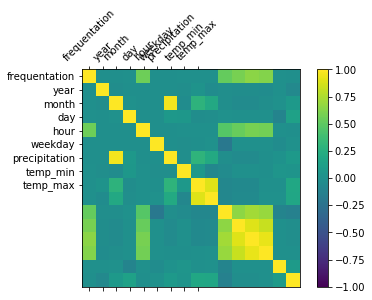

In [46]:
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

names = ['frequentation', 'year', 'month','day', 'hour', 'weekday', 'precipitation', 'temp_min','temp_max','co2_d','co2_w','co2','celebration','holiday']
ax.set_xticklabels(names, rotation = 45)
ax.set_yticklabels(names)
plt.show()

## Feature engineering

In [114]:
data['co2_log'] = data['co2'].apply(lambda x:np.log(x))
data['co2_d_log'] = data['co2_d'].apply(lambda x:np.log(x))
data['co2_w_log'] = data['co2_w'].apply(lambda x:np.log(x))
data['precipitation_log'] = data['precipitation'].apply(lambda x:np.log(x+0.001))

for i in range(lag,window):
    data['co2_log'] = data[source + '_' + str(i)].apply(lambda x:np.log(x))

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

#### Normalization

In [156]:
from sklearn.preprocessing import StandardScaler
scalers = {}
features_to_scale = ['co2_log','frequentation','co2_d_log','co2_w_log',
                     'precipitation_log','hour','weekday','day',
                     'month','year','temp_min','temp_max','a','b',
                     '1','11','14','3','4','7', '8','9'] + [source + '_' + str(i) for i in range(lag,window)]


for feature in features_to_scale:
    scalers['feature'] = StandardScaler()
    scalers['feature'].fit_transform(data[feature].reshape(-1, 1))


/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  # This is added back by InteractiveShellApp.init_path()


## Modelization

In [157]:
USE_FREQ = False
USE_SLIDING_WINDOW = True

features = ['year','month','day','hour', 'weekday', 'precipitation','temp_min','temp_max','co2_d', 'co2_w','celebration','holiday']
if USE_FREQ:
    features += ['frequentation']
else:
    features += ['a','b','1','11','14','3','4','7', '8','9']

if USE_SLIDING_WINDOW:
    features += [source +'_' + str(i) for i in range(lag,window)]

In [158]:
X = data[features].values
Y = data['co2'].values.reshape(-1,1)

In [159]:
data[features].columns

Index([u'year', u'month', u'day', u'hour', u'weekday', u'precipitation',
       u'temp_min', u'temp_max', u'co2_d', u'co2_w', u'celebration',
       u'holiday', u'a', u'b', u'1', u'11', u'14', u'3', u'4', u'7', u'8',
       u'9', u'co2_1', u'co2_2', u'co2_3', u'co2_4', u'co2_5', u'co2_6',
       u'co2_7', u'co2_8', u'co2_9', u'co2_10', u'co2_11', u'co2_12',
       u'co2_13', u'co2_14', u'co2_15', u'co2_16', u'co2_17', u'co2_18',
       u'co2_19', u'co2_20', u'co2_21', u'co2_22', u'co2_23'],
      dtype='object')

In [160]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import ensemble

In [161]:
cv_ratio = 0.8

In [162]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

###### Baseline

In [144]:
from sklearn.metrics import r2_score

Simply use the mean of co2 as average

In [145]:
mean = np.average(Y_train)

In [146]:
Y_baseline_1 = np.full(Y_test.shape,mean)

In [147]:
baseline_1 = r2_score(Y_test,Y_baseline_1)

In [148]:
print(baseline_1)

-0.00012075989350601724


Use the value of co2 from the day before

In [149]:
baseline_2 = r2_score(X_train[:,0],X_train[:,13])

In [150]:
print(baseline_2)

-3256595.0355452243


#### Ridge Regression

In [163]:
clf = linear_model.Lasso(alpha = 0.1)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.6468383296209874

In [164]:
for idx in range(len(features)):
    print(features[idx],clf.coef_[idx])

('year', -0.5692601334530818)
('month', 0.8169920727870366)
('day', 0.2359837227015135)
('hour', 0.3777401870768952)
('weekday', -11.024801114416967)
('precipitation', -0.8838165585586951)
('temp_min', 0.0887230377527875)
('temp_max', -0.3695864178971488)
('co2_d', 0.15223171541898747)
('co2_w', 0.040210459792806824)
('celebration', -51.85561778364292)
('holiday', -20.618837368305805)
('a', -0.02798206182109303)
('b', 0.0)
('1', 0.0)
('11', 0.0)
('14', 0.0)
('3', 0.0013672727712391282)
('4', 0.0)
('7', -0.03508479675959395)
('8', -0.027923508155214005)
('9', 0.07694655415227027)
('co2_1', 0.14839382607241475)
('co2_2', 0.05605864370311604)
('co2_3', 0.06082116990372269)
('co2_4', 0.031066192809020267)
('co2_5', 0.035022980803504536)
('co2_6', 0.03079160365032893)
('co2_7', 0.01752592225597884)
('co2_8', 0.01994640575890761)
('co2_9', 0.029638402686372627)
('co2_10', 0.03714491017210714)
('co2_11', 0.02842585510385081)
('co2_12', 0.03407466808490509)
('co2_13', 0.02646853897749774)
('co

#### ElasticNet Regression

In [165]:
clf = linear_model.ElasticNet(alpha = 0.1)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

0.6437205529564045

In [ ]:
coeff = []
for idx in range(len(features)):
    print(features[idx],clf.coef_[idx])
    coeff += [[features[idx],clf.coef_[idx]]]

print(sorted(coeff, key = lambda x: x[1]))

#### Random Forest Regression

In [ ]:
clf = ensemble.RandomForestRegressor(n_estimators = 5000)
clf.fit(X_train,Y_train)
clf.score(X_test,Y_test)

/home/romain/.virtualenvs/python2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [134]:
for idx in range(len(features)):
    print(features[idx],clf.feature_importances_[idx])

('year', 0.011057421834341228)
('month', 0.02549007079545917)
('day', 0.025461512782499123)
('hour', 0.10772006945485893)
('weekday', 0.1555018207593163)
('precipitation', 0.0185515330195173)
('temp_min', 0.018448964308530314)
('temp_max', 0.026027725617268037)
('co2_d', 0.47940533954439535)
('co2_w', 0.04887848273797469)
('celebration', 0.02416361037823532)
('holiday', 0.01515520094622912)
('a', 0.0056001713558156965)
('b', 0.0)
('1', 0.0)
('11', 0.0)
('14', 0.0)
('3', 0.012721664744456292)
('4', 0.0)
('7', 0.0068748840892867424)
('8', 0.008846084219964608)
('9', 0.010095443411851805)


In [69]:
from sklearn.model_selection import GridSearchCV

###### Grid search random forest

In [65]:
clf = ensemble.RandomForestRegressor(n_jobs=4)

In [66]:
param_grid = {
    "n_estimators":[1000,5000],
    "min_samples_split":[2,3],
    "min_samples_leaf":[1,2]
}

In [67]:
gridcv = GridSearchCV(clf,param_grid)

In [ ]:
gridcv.fit(X,Y)

In [63]:
gridcv.best_params_

{'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400}

param_grid = {
    "n_estimators":[100,200,300,400],
    "min_samples_split":[2,3],
    "min_samples_leaf":[1,2]
}
best : {'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400}

In [64]:
gridcv.best_score_

0.7979210040554795